In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
x = np.matrix([0.0, 0.0, 0.0, 0.0]).T
print(x, x.shape)

(matrix([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), (4, 1))


In [111]:
t = 0.1 
# Dynamic Matrix
A = np.matrix([[1.0, 0.0, t, 0.0],
              [0.0, 1.0, 0.0, t],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

(matrix([[ 1. ,  0. ,  0.1,  0. ],
        [ 0. ,  1. ,  0. ,  0.1],
        [ 0. ,  0. ,  1. ,  0. ],
        [ 0. ,  0. ,  0. ,  1. ]]), (4, 4))


In [112]:
# Measurment Matrix
C = np.matrix([[0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(C, C.shape)

(matrix([[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]]), (2, 4))


In [113]:
B = np.matrix([[0.5*t**2],
               [0.5*t**2],
               [t],
               [t]])

print(B, B.shape)

(matrix([[ 0.005],
        [ 0.005],
        [ 0.1  ],
        [ 0.1  ]]), (4, 1))


In [114]:
sv = 8.8  
Q = B*B.T*sv**2  # Acceleartion process noise
print(Q, Q.shape)

(matrix([[ 0.001936,  0.001936,  0.03872 ,  0.03872 ],
        [ 0.001936,  0.001936,  0.03872 ,  0.03872 ],
        [ 0.03872 ,  0.03872 ,  0.7744  ,  0.7744  ],
        [ 0.03872 ,  0.03872 ,  0.7744  ,  0.7744  ]]), (4, 4))


In [115]:
# Initial Uncertainty
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0]) 
print(P, P.shape)

(array([[ 1000.,     0.,     0.,     0.],
       [    0.,  1000.,     0.,     0.],
       [    0.,     0.,  1000.,     0.],
       [    0.,     0.,     0.,  1000.]]), (4, 4))


In [116]:
# Measurement Noise
s = 10.0**2

R = np.matrix([[s, 0.0],
              [0.0, s]])
print(R, R.shape)

(matrix([[ 100.,    0.],
        [   0.,  100.]]), (2, 2))


In [117]:
m = 200 # Measurements
vx= 20
vy= 10 

mx = np.array(vx+1*np.random.randn(m))
my = np.array(vy+1*np.random.randn(m))

measurements = np.vstack((mx,my))

print(measurements.shape)

print('Standard Deviation of Measurements=%.2f' % np.std(mx))
print('Standard Deviation of Measurements=%.2f' % np.std(my))

(2, 200)
Standard Deviation of Measurements=1.01
Standard Deviation of Measurements=0.99


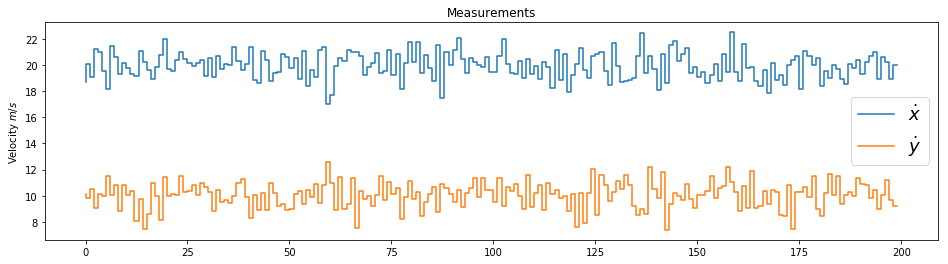

In [118]:
img = plt.figure(figsize=(16,4))

plt.step(range(m),mx, label='$\dot x$')
plt.step(range(m),my, label='$\dot y$')
plt.ylabel('Velocity $m/s$')
plt.title('Measurements')
plt.legend(loc='best',prop={'size':18})

In [119]:
xt = []
yt = []
dxt= []
dyt= []

def savestates(x):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))

In [120]:
I = np.eye(4)
print(I, I.shape)

(array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]]), (4, 4))


In [121]:
for n in range(len(measurements[0])):
    
    # Prediciton
    x = A*x # State [Linear Equ.]
    P = A*P*A.T + Q # Error covarience
    
    # Correction
    # Step 1
    K = (P*C.T) * np.linalg.pinv(C*P*C.T + R) # Kalman gain 
    # Step 2
    Z = measurements[:,n].reshape(2,1)
    x = x + (K * (Z - (C * x))) 
    # Step 3
    P = (I - (K*C))*P 
    
    savestates(x)

In [122]:
def plot_x():
    fig = plt.figure(figsize=(16,9))
    plt.step(range(len(measurements[0])),dxt, label='$\dot x$')
    plt.step(range(len(measurements[0])),dyt, label='$\dot y$')

    plt.axhline(vx, color='#999999', label='$\dot x_{asm}$')
    plt.axhline(vy, color='#999999', label='$\dot y_{asm}$')

    plt.xlabel('Filter Step')
    plt.title('Estimate (Elements from State Vector)')
    plt.legend(loc='best',prop={'size':22})
    plt.ylim([0, 30])
    plt.ylabel('Velocity')

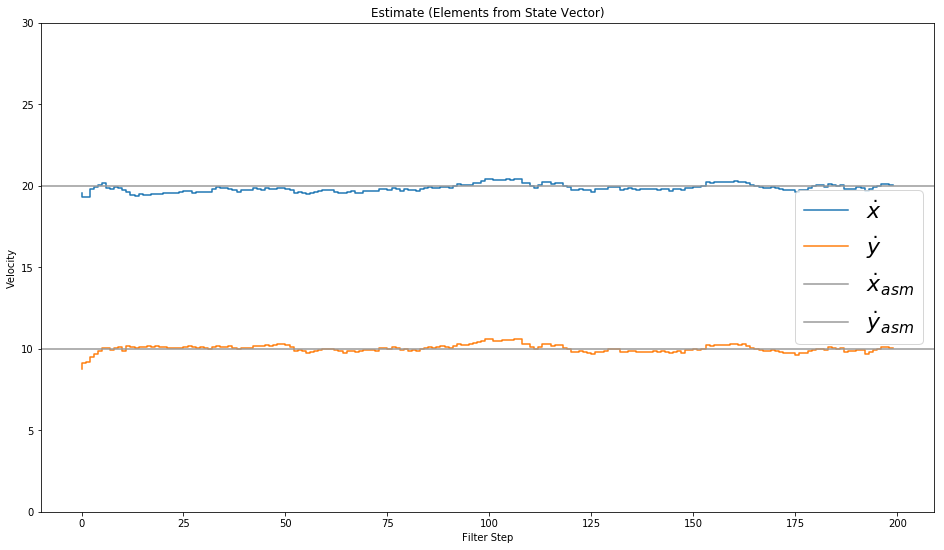

In [104]:
plot_x()